In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
mortality_data = pd.read_csv('mortality_status.csv')

In [201]:
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 150)

In [202]:
print("Mortality Data Info:")
mortality_data.info()

Mortality Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4007 non-null   int64
 1   Sex                     4007 non-null   int64
 2   T_Stage                 4007 non-null   int64
 3   N_Stage                 4007 non-null   int64
 4   6th_Stage               4007 non-null   int64
 5   Differentiated          4007 non-null   int64
 6   Grade                   4007 non-null   int64
 7   A_Stage                 4007 non-null   int64
 8   Tumor_Size              4007 non-null   int64
 9   Estrogen_Status         4007 non-null   int64
 10  Progesterone_Status     4007 non-null   int64
 11  Regional_Node_Examined  4007 non-null   int64
 12  Reginol_Node_Positive   4007 non-null   int64
 13  Survival_Months         4007 non-null   int64
 14  Mortality_Status        4007 non-null   int64
dtype

In [203]:
print("\nMortality Data Sample:")
print(mortality_data.head())



Mortality Data Sample:
   Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0   68    1        0        0          0               1      3        1           4                1                    1                      24   
1   50    1        1        1          2               0      2        1          35                1                    1                      14   
2   58    1        2        2          4               0      2        1          63                1                    1                      14   
3   58    1        0        0          0               1      3        1          18                1                    1                       2   
4   47    1        1        0          1               1      3        1          41                1                    1                       3   

   Reginol_Node_Positive  Survival_Months  Mortality_Status  
0            

In [204]:
feature_cols = [column for column in mortality_data.columns if column != 'Mortality_Status']
X = mortality_data[feature_cols]
y = mortality_data['Mortality_Status']

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [206]:
from sklearn.model_selection import train_test_split, GridSearchCV , StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
print('whole data set ',mortality_data.shape)
print('x_train shape',X_train.shape)
print('X_test shape',X_test.shape)


whole data set  (4007, 15)
x_train shape (3205, 14)
X_test shape (802, 14)


In [208]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [209]:
y_pred = logreg.predict(X_test)

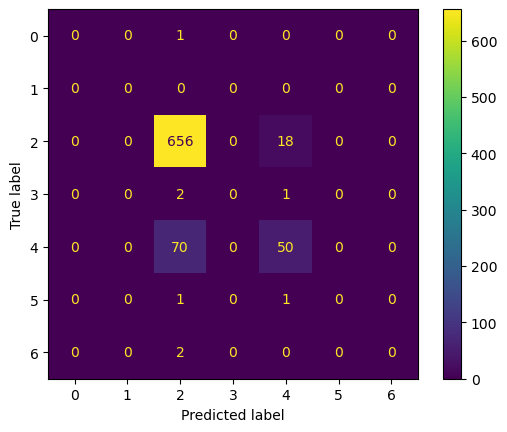

In [210]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
desp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
desp.plot()

In [211]:
from sklearn.metrics import classification_report,accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred,zero_division=0))


Logistic Regression Accuracy: 0.8802992518703242

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.90      0.97      0.93       674
           3       0.00      0.00      0.00         3
           4       0.71      0.42      0.53       120
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.88       802
   macro avg       0.27      0.23      0.24       802
weighted avg       0.86      0.88      0.86       802



In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,25),'metric':['euclidean','manhattan']}
knn_gscv = GridSearchCV(knn, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
knn_gscv.fit(X,y)

# y_pred_knn = knn.predict(X_test)
# print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test,y_pred))

d:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

In [213]:
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 14}

In [214]:
y_pred = knn_gscv.predict(X_test)

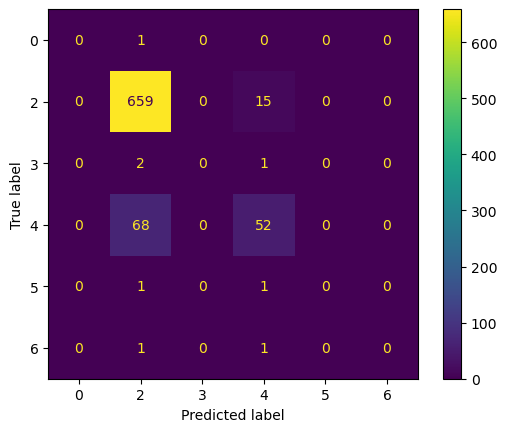

In [215]:
cm_knn = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=np.unique(y_test))
disp_knn_cm.plot()

In [216]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.90      0.98      0.94       674
           3       0.00      0.00      0.00         3
           4       0.74      0.43      0.55       120
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.89       802
   macro avg       0.27      0.24      0.25       802
weighted avg       0.87      0.89      0.87       802



In [217]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.1970074812967581


In [218]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Use ravel() to flatten y_train
gscv = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=3)
gscv.fit(X_train, y_train.values.ravel())

print("Best Parameters:", gscv.best_params_)

d:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please 

Best Parameters: {'C': 0.1}


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
